# Setup

In [19]:
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Prepare Data

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


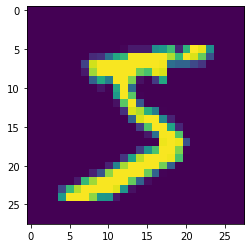

In [20]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

plt.imshow(x_train[0])
plt.show()

# Build Model

In [21]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
# Train the model

In [22]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 8s 19ms/step - loss: 0.7722 - accuracy: 0.7676 - val_loss: 0.0803 - val_accuracy: 0.9790
Epoch 2/15
422/422 [==============================] - 8s 19ms/step - loss: 0.1233 - accuracy: 0.9627 - val_loss: 0.0581 - val_accuracy: 0.9852
Epoch 3/15
422/422 [==============================] - 8s 19ms/step - loss: 0.0903 - accuracy: 0.9717 - val_loss: 0.0476 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0703 - accuracy: 0.9779 - val_loss: 0.0401 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 8s 19ms/step - loss: 0.0594 - accuracy: 0.9820 - val_loss: 0.0390 - val_accuracy: 0.9910
Epoch 6/15
422/422 [==============================] - 8s 19ms/step - loss: 0.0549 - accuracy: 0.9829 - val_loss: 0.0381 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0496 - accuracy: 0.9845 - val_loss: 0.0353 - val_accuracy: 0.9908

In [ ]:
# Evaluate the trained model

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024002626538276672
Test accuracy: 0.991599977016449


In [ ]:
# Visualize model

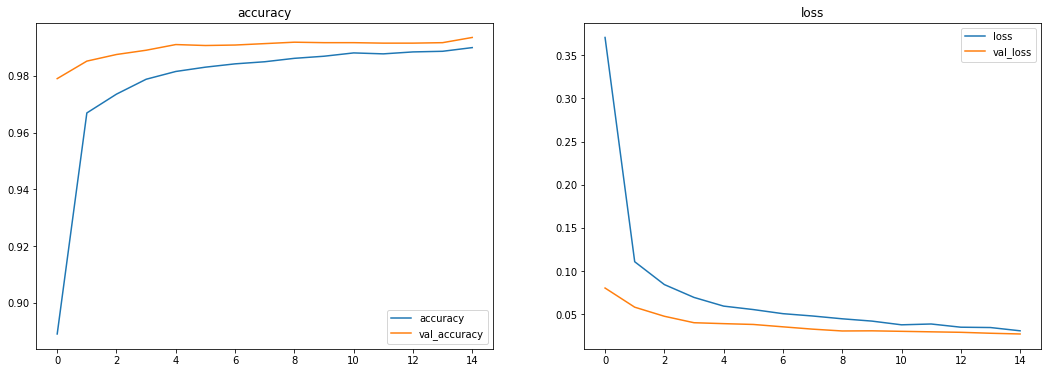

In [24]:
plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

In [ ]:
# Save model

model.save("./mnist.h5")

# load model

In [34]:
model2 = keras.models.load_model("./mnist.h5")
# when error occured : AttributeError: 'str' object has no attribute 'decode'
# pip install 'h5py<3.0.0'

AttributeError: 'str' object has no attribute 'decode'

# Reference
- https://keras.io/examples/vision/mnist_convnet/